# Feature Analysis and Preparation

This notebook focuses on analyzing and preparing features for machine learning model training. Below are the steps we will follow:

## Steps
1. **Exploratory Data Analysis (EDA)**
   - Understand feature distributions.
   - Check for missing values.
   - Visualize distributions of the features.

2. **Feature-to-Label Analysis**
   - Examine relationships between features and labels.
   - Use techniques like correlation analysis, random forest importance, and scatter plots.

3. **Feature-to-Feature Analysis**
   - Analyze relationships among features to detect redundancy or multicollinearity.
   - Use correlation matrices and Variance Inflation Factor (VIF).

4. **Feature Scaling**
   - Standardize or normalize features to ensure they are on a similar scale.

5. **Feature Selection**
   - Select features with high importance and minimal multicollinearity.
   - Drop irrelevant or redundant features.

6. **Feature Engineering**
   - Create new features from existing ones to capture more information.
   - Examples: rolling averages, differences, and ratios.

---

## Project Context
- **Goal**: Predict body movements using GPS and IMU data collected from an iPhone.
- **Dataset**: Combined data with GPS features, accelerometer, gyroscope, and orientation data, resampled to 1 Hz.
- **Labels**: Movement categories such as "Stop," "Moving Forward," "Turn Left," and "Turn Right."

---

Let’s get started!


## Step 0: Load Combined Data
Before starting the feature analysis, we reload the combined dataset created in the previous steps. This dataset includes GPS and IMU data, aggregated and resampled to 1 Hz, along with movement labels.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the combined dataset
combined_data = pd.read_csv('../data-collection/2024-12-10_22-37-46_Data/processed_features.csv')

# Display basic information about the dataset
print("Dataset Loaded Successfully.")
print(combined_data.head())

Dataset Loaded Successfully.
                 Timestamp  latitude  longitude  altitude  speed   course  \
0  2024-12-10 22:37:47.999  51.07762 -114.12982  1106.786   0.00  148.711   
1  2024-12-10 22:37:48.999  51.07762 -114.12982  1106.901   0.00  148.711   
2  2024-12-10 22:37:49.999  51.07762 -114.12982  1106.773   0.16  164.531   
3  2024-12-10 22:37:50.999  51.07762 -114.12981  1106.890   0.00  177.188   
4  2024-12-10 22:37:52.000  51.07763 -114.12981  1107.429   0.00  177.188   

    hacc  course_diff       Label  Accel_X_mean  ...    Roll_min    Roll_var  \
0  5.267        0.000        Stop     -0.085682  ...  -51.027298   66.437643   
1  4.978        0.000        Stop     -6.300973  ...  -64.109286   25.912506   
2  4.646       15.820  Turn Right     -6.528521  ...  -93.782793   78.589763   
3  4.573       12.657        Stop     -1.060218  ... -164.076100  107.122511   
4  5.229        0.000        Stop     -1.753597  ... -130.992877    9.615669   

   Pitch_mean  Pitch_max  P

## Step 1: Exploratory Data Analysis (EDA)
In this step, we will:
- Understand feature distributions
- Check for missing values

In [2]:
# Check data types, shape, and missing values
print(combined_data.info())
print(combined_data.isnull().sum())

# Descriptive statistics
display(combined_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     425 non-null    object 
 1   latitude      425 non-null    float64
 2   longitude     425 non-null    float64
 3   altitude      425 non-null    float64
 4   speed         425 non-null    float64
 5   course        425 non-null    float64
 6   hacc          425 non-null    float64
 7   course_diff   425 non-null    float64
 8   Label         425 non-null    object 
 9   Accel_X_mean  425 non-null    float64
 10  Accel_X_max   425 non-null    float64
 11  Accel_X_min   425 non-null    float64
 12  Accel_X_var   425 non-null    float64
 13  Accel_Y_mean  425 non-null    float64
 14  Accel_Y_max   425 non-null    float64
 15  Accel_Y_min   425 non-null    float64
 16  Accel_Y_var   425 non-null    float64
 17  Accel_Z_mean  425 non-null    float64
 18  Accel_Z_max   425 non-null    

,latitude,longitude,altitude,speed,course,hacc,course_diff,Accel_X_mean,Accel_X_max,Accel_X_min,...,Roll_min,Roll_var,Pitch_mean,Pitch_max,Pitch_min,Pitch_var,Yaw_mean,Yaw_max,Yaw_min,Yaw_var
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,51.075495,-114.121384,1110.299781,3.656167,94.118456,9.533134,-0.269445,-0.812346,1.865391,-3.708297,...,-100.113337,2234.169959,81.628385,84.097206,79.113350,9.338206,72.332307,104.050843,35.735328,1830.648991
std,0.001236,0.005971,3.415528,2.466542,47.819059,9.047233,24.953553,0.694263,1.979196,4.068121,...,85.270703,6025.588535,10.980842,9.084407,13.735791,46.732873,77.898025,74.289299,106.947364,5255.010649
min,51.074260,-114.129820,1103.227000,0.000000,0.000000,4.173000,-311.815000,-6.528521,-1.255439,-54.811219,...,-179.996879,0.067196,-39.329417,-28.235832,-52.146432,0.001112,-174.185006,-170.782828,-179.971682,0.061834
25%,51.074400,-114.126820,1108.899000,0.597000,82.591000,5.167000,-0.494000,-1.067305,0.878673,-4.121080,...,-159.080017,15.509775,81.389064,83.438480,79.471351,0.169776,45.192954,98.534786,-6.138889,10.322820
50%,51.075070,-114.120990,1109.646000,4.552000,95.534000,5.771000,0.000000,-0.833991,1.507365,-2.889292,...,-126.828841,49.108107,83.760156,85.102523,82.290684,0.424424,101.710430,120.714624,83.878604,34.156405
75%,51.076470,-114.117720,1112.289000,5.931000,118.391000,8.124000,0.997000,-0.401561,2.477199,-2.053130,...,-77.248288,335.321449,85.345061,86.957198,84.096597,1.884112,120.981427,144.882340,111.290305,259.706876
max,51.077680,-114.110920,1118.986000,6.613000,338.125000,40.750000,248.125000,1.510210,22.044059,0.356559,...,171.845785,31160.971314,89.230535,89.970227,88.331920,776.120406,170.908642,179.976659,160.794466,29909.971443


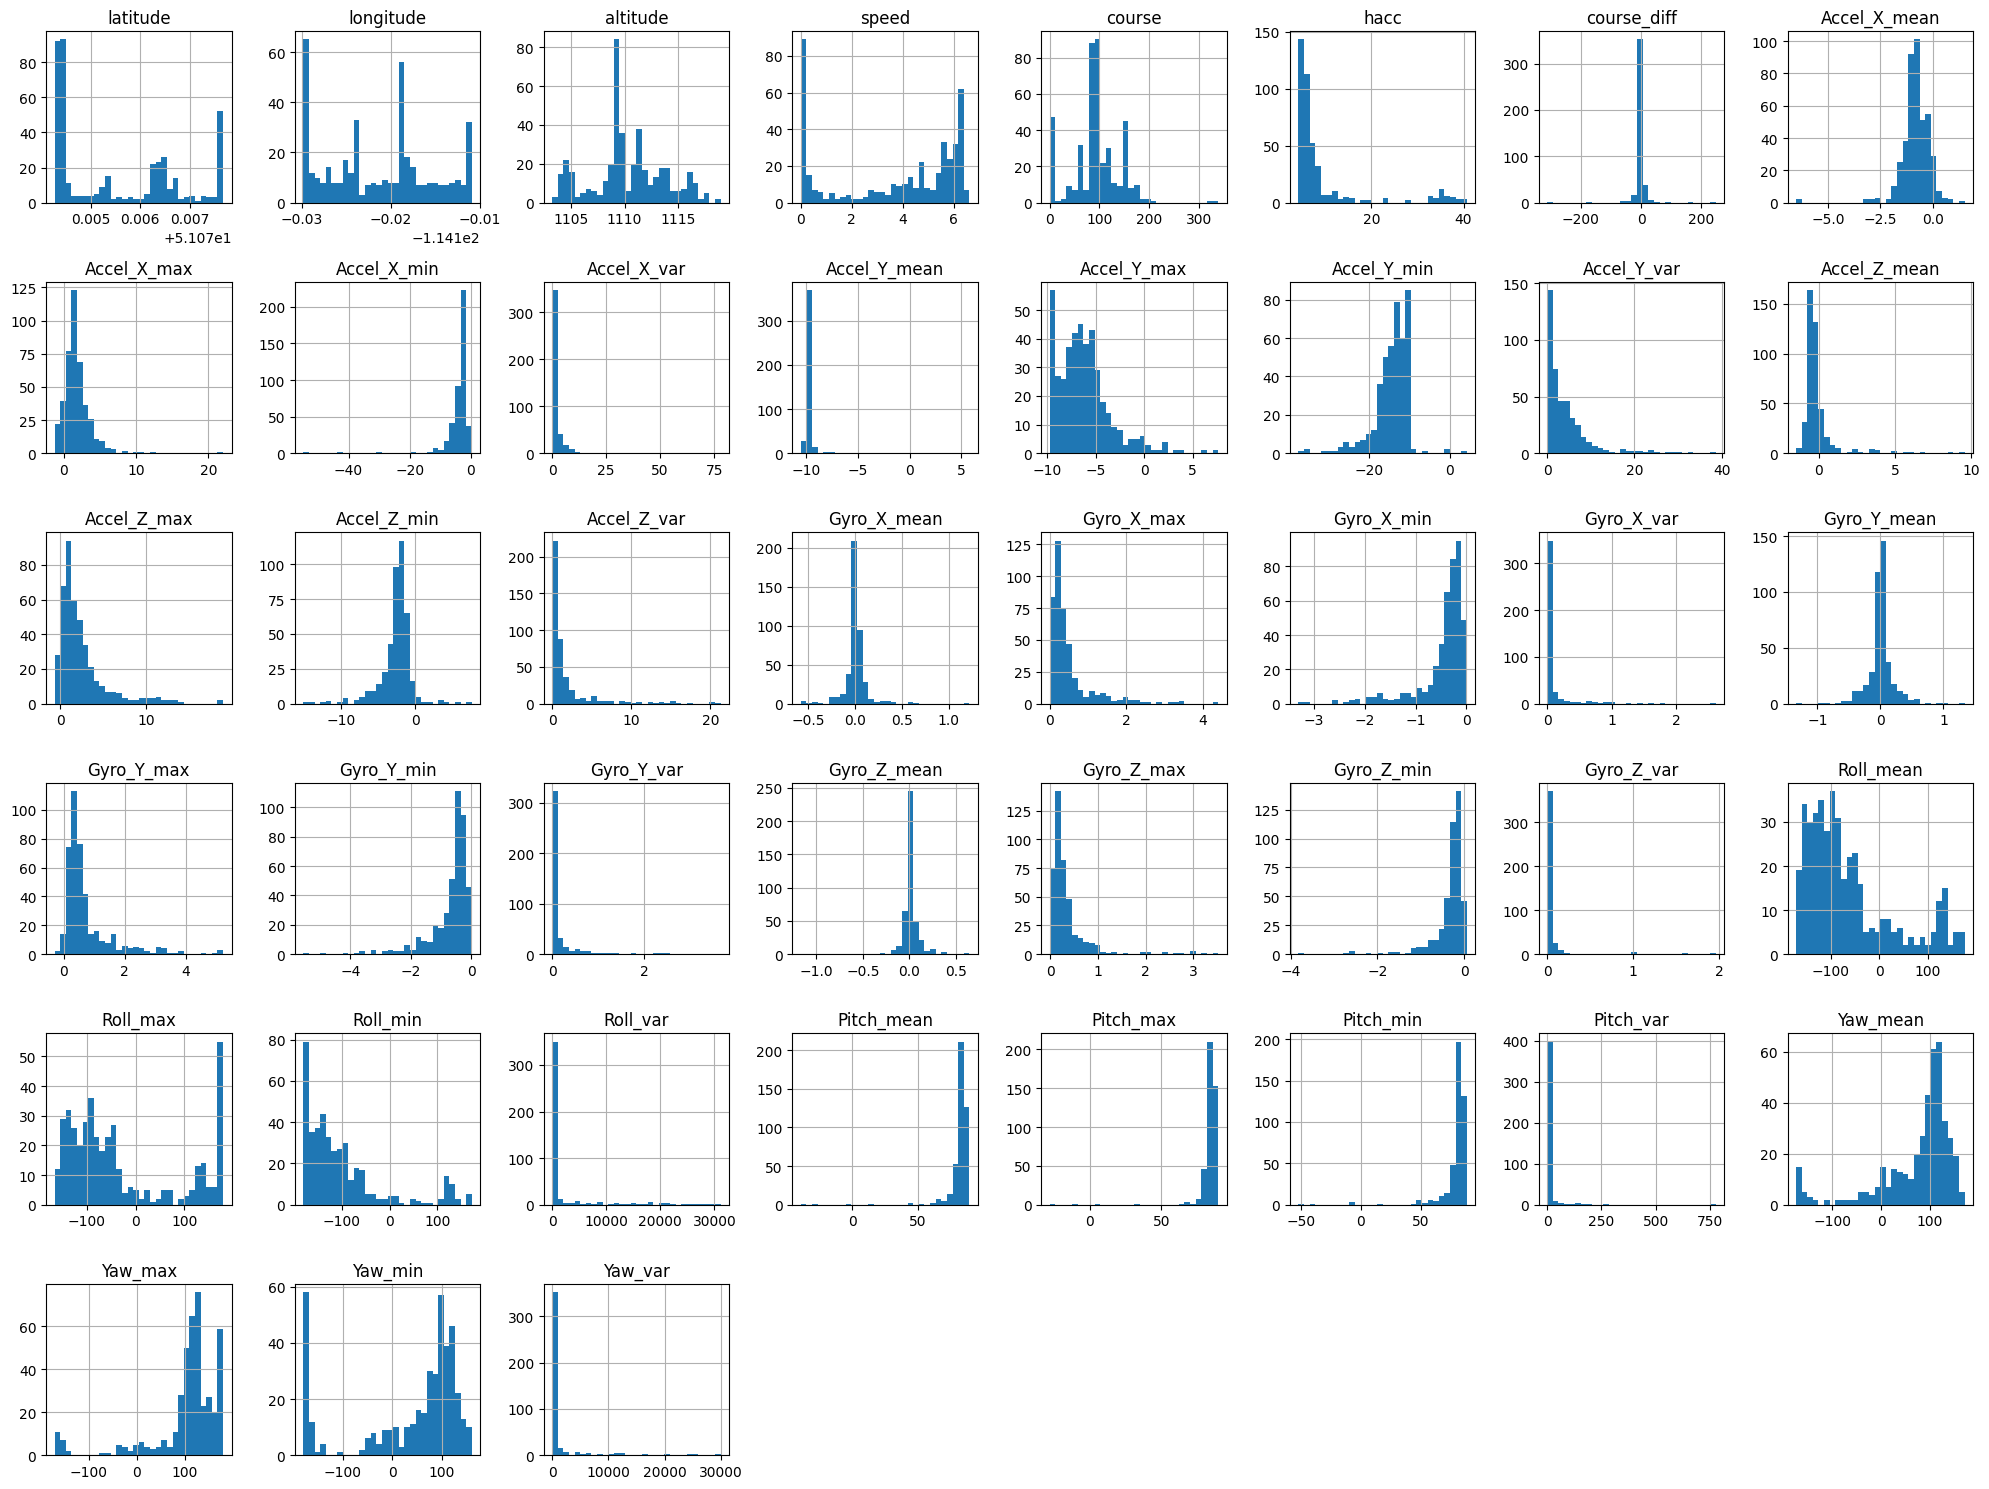

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions
combined_data.hist(figsize=(20, 15), bins=30, layout=(6, 8))
plt.tight_layout()
plt.show()

## Step 2: Feature-to-Label Analysis
In this step, we will:
- Analyze the relationship between each feature and the label.
- Use correlation, feature importance (random forest), and scatter plots.

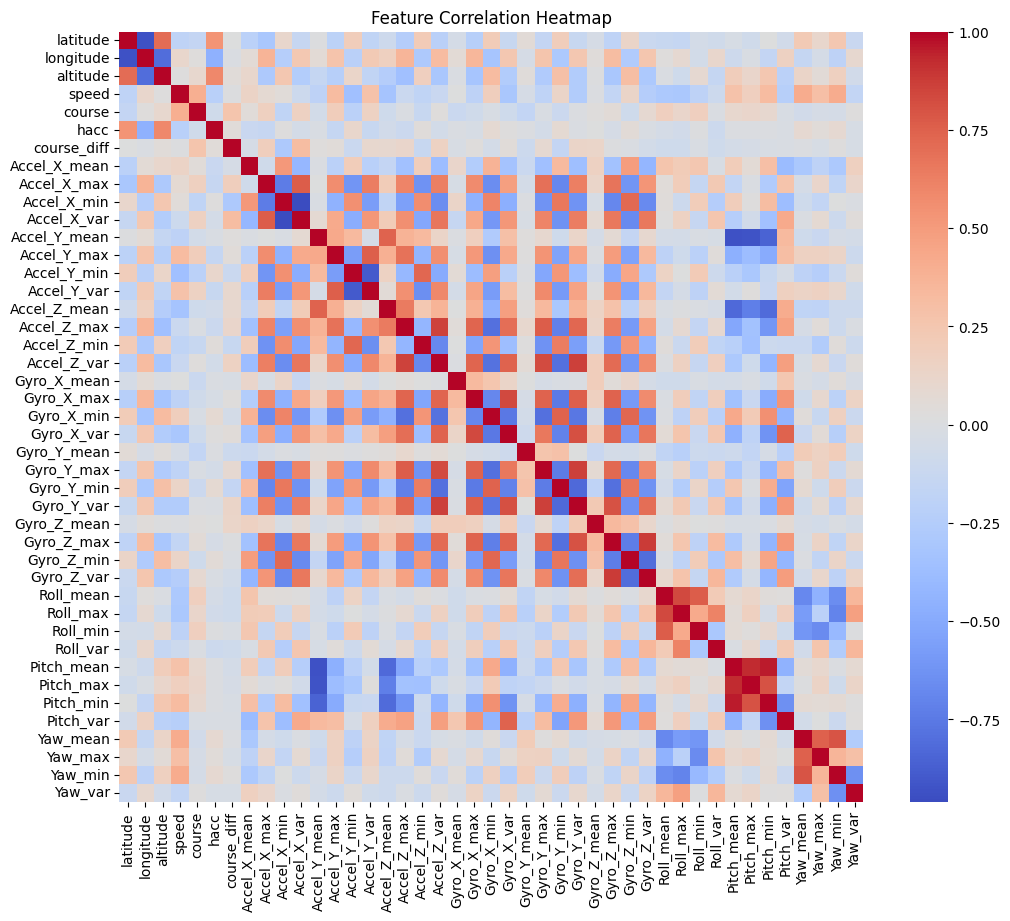

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns (e.g., 'Timestamp') for correlation calculation
numeric_data = combined_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation with the label (if 'Label' exists)
if 'Label' in correlation_matrix.columns:
    print("Correlation with the label:")
    print(correlation_matrix['Label'])

# Visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


### Key Observations from Feature Correlation Heatmap

1. **Diagonal Values**:
   - The diagonal has values of 1 (dark red) because every feature is perfectly correlated with itself.

2. **High Positive Correlation (Red Areas)**:
   - Features like `Accel_X_max`, `Accel_X_min`, and `Accel_X_var` show strong correlations as they are derived from the same sensor data.
   - Similarly, features such as `Gyro_Y_mean` and `Gyro_Y_var` exhibit strong correlations.

3. **High Negative Correlation (Blue Areas)**:
   - Strong negative correlations indicate an inverse relationship between features. For instance, `Pitch_mean` and some other features have noticeable negative correlations.

4. **Low or No Correlation (Light Areas)**:
   - Features such as `latitude` and `speed` show weak or no correlation with other features, suggesting independence or less relevance.

---

### Next Steps Based on Observations

1. **Identify Redundant Features**:
   - Highly correlated features (e.g., > 0.8 correlation) might be redundant. Consider retaining only one to reduce overfitting.

2. **Feature Importance with Respect to Labels**:
   - Analyze correlations of features with the `Label` column. Features with strong correlations may be more important for prediction.

3. **Variance Inflation Factor (VIF)**:
   - Perform VIF analysis to identify and address multicollinearity.

4. **Feature Engineering**:
   - If two features are highly correlated but have distinct predictive powers, consider engineering new features (e.g., ratios or differences).


         Feature  Importance
6    course_diff    0.278459
3          speed    0.106719
12   Accel_Y_max    0.056073
13   Accel_Y_min    0.054249
14   Accel_Y_var    0.042332
31     Roll_mean    0.033309
32      Roll_max    0.022355
41       Yaw_min    0.021745
0       latitude    0.021370
36     Pitch_max    0.020157
4         course    0.019240
1      longitude    0.018938
23   Gyro_Y_mean    0.017373
33      Roll_min    0.016461
10   Accel_X_var    0.015229
35    Pitch_mean    0.014863
21    Gyro_X_min    0.013746
42       Yaw_var    0.013153
39      Yaw_mean    0.013064
18   Accel_Z_var    0.012551
29    Gyro_Z_min    0.012525
19   Gyro_X_mean    0.012125
40       Yaw_max    0.012016
30    Gyro_Z_var    0.011172
16   Accel_Z_max    0.011086
15  Accel_Z_mean    0.010278
37     Pitch_min    0.010093
7   Accel_X_mean    0.009386
8    Accel_X_max    0.008523
5           hacc    0.008338
25    Gyro_Y_min    0.008245
28    Gyro_Z_max    0.008083
2       altitude    0.008065
27   Gyro_Z_me

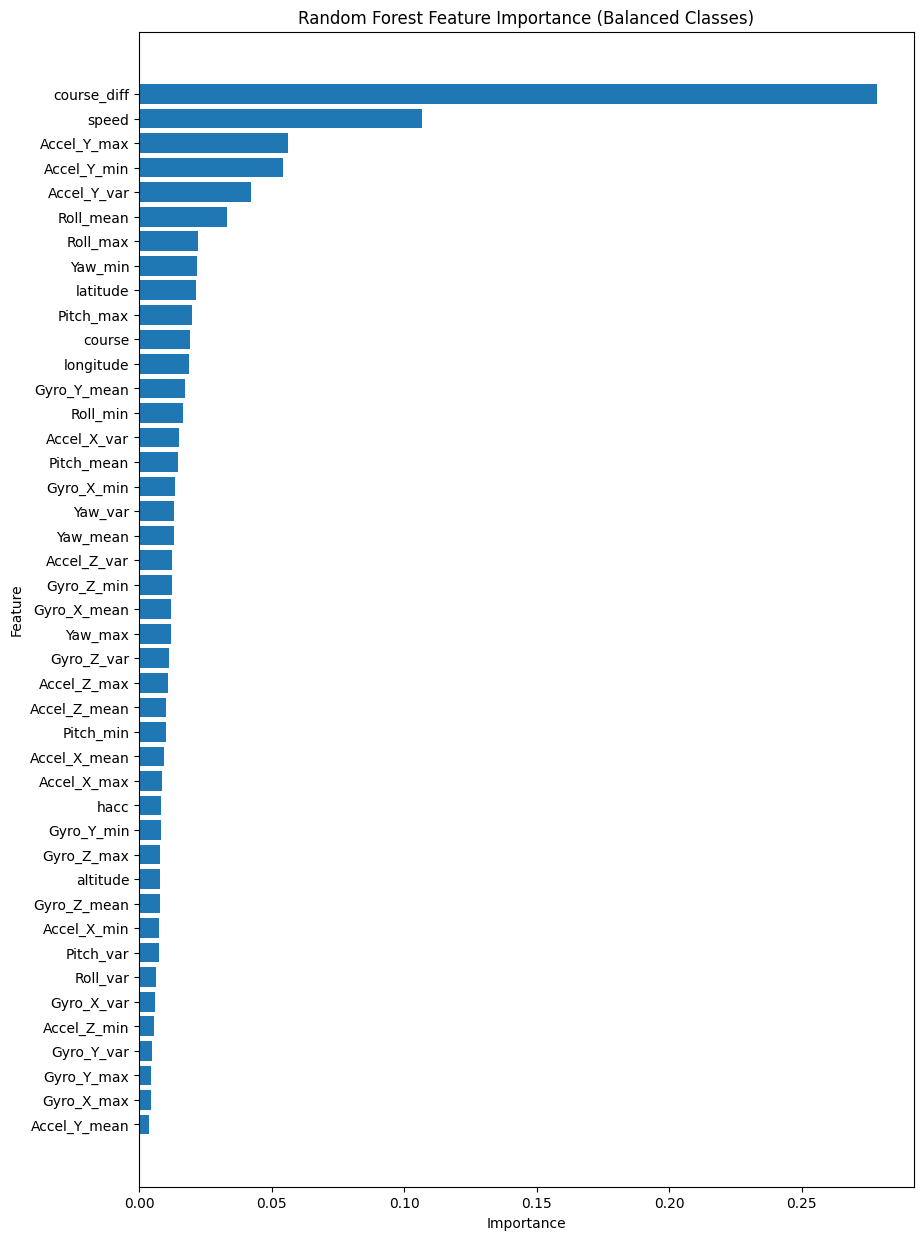

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop non-numeric columns
X = combined_data.drop(['Timestamp', 'Label'], axis=1)
y = combined_data['Label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# To map back numeric labels to their original categories:
# print(dict(enumerate(label_encoder.classes_)))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the random forest classifier with class weighting
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 15))  # Adjust the figure size (width, height)
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance (Balanced Classes)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


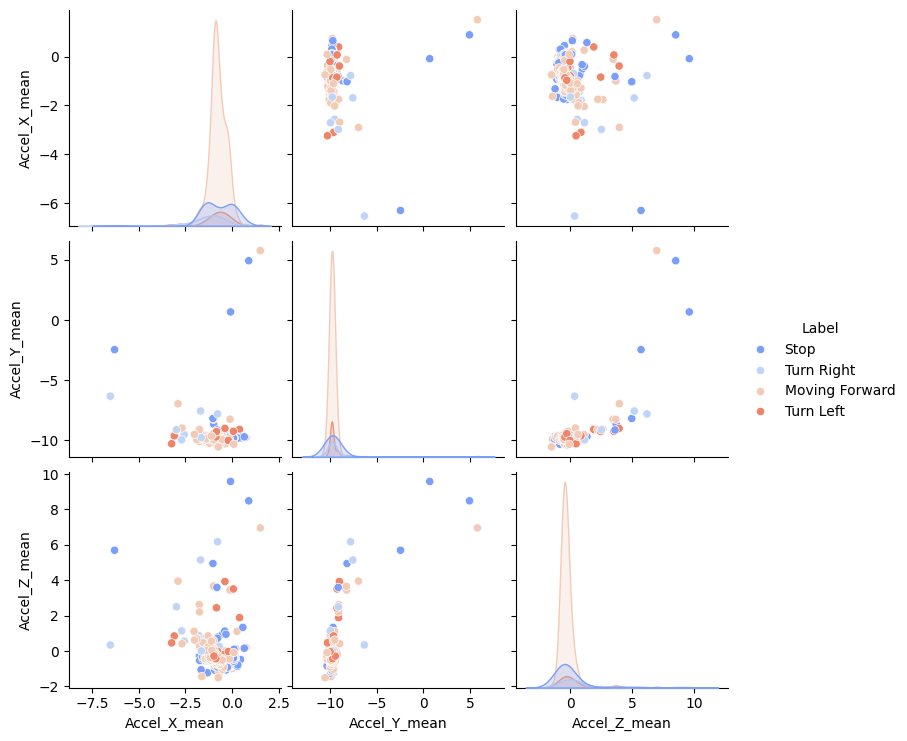

In [14]:
# Scatter plots of selected features vs label
sns.pairplot(combined_data, vars=['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean'], hue='Label', palette='coolwarm')
plt.show()

## Step 3: Feature-to-Feature Analysis
In this step, we will:
- Analyze relationships between features to detect redundancy.
- Use correlation matrices and Variance Inflation Factor (VIF).

In [ ]:
# Correlation matrix
correlation_matrix = combined_data.corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

## Step 4: Feature Scaling
In this step, we will:
- Scale features to ensure uniformity for models sensitive to feature magnitude.
- Apply standardization or normalization.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled successfully.")

## Step 5: Feature Selection
In this step, we will:
- Select features based on their importance and multicollinearity.
- Drop redundant or less important features.

In [ ]:
# Drop features with high VIF or low importance (example)
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
X_selected = X[selected_features]

print(f"Selected Features: {list(selected_features)}")

## Step 6: Feature Engineering
In this step, we will:
- Create new features from existing ones if applicable.
- Examples: rolling averages, differences, or ratios.

In [ ]:
# Create a new feature as the difference between max and min acceleration
combined_data['Accel_Range'] = combined_data['Accel_X_max'] - combined_data['Accel_X_min']

# Add rolling average for orientation
combined_data['Orientation_RollingAvg'] = combined_data['Orientation_X_mean'].rolling(window=5).mean()

print("New features added.")